<a href="https://colab.research.google.com/github/NophaieViscente/PredictSalary/blob/main/PredictSalary_RegressionProblemExample_Training_Evaluating_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transformação dos dados e Treinamento/Avaliação dos modelos de Aprendizado de Máquina

* Este notebook conterá a parte de treinamento e avaliação dos modelos, bem como transformação de dados caso sejam necessárias.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Carregamento das bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Carregamento dos dados para treino

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Train_rev2.csv')

### Retirando coluna Unnamed: 0

In [4]:
train.drop('Unnamed: 0', axis=1, inplace=True)

* Visualizando o dataSet

In [5]:
train.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,LowSalaryRange,HighSalaryRange,Rate_by,SalaryBin
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,20000,30000,Yearly,0
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,25000,35000,Yearly,1
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk,20000,40000,Yearly,1
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk,25000,30000,Yearly,1
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,20000,30000,Yearly,0


* Vamos carregar os dados do dataset em uma cópia para caso necessitemos, só executamos novamente a partir desse ponto.

In [6]:
df_tmp = train

## Iniciando as transformações.

* Inicialmente vamos verificar a distribuição dos dados da coluna SalaryNormalized

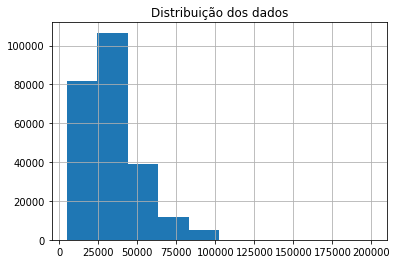

In [7]:
df_tmp.SalaryNormalized.hist()
plt.title('Distribuição dos dados')
plt.show()

Pode-se observar que os dados tem uma assimetria a direita

* Criando coluna com os dados normalizados.

In [8]:
df_tmp['SalaryNormal'] = np.log(df_tmp.SalaryNormalized)

* Plotando gráficos comparativos entre as colunas SalaryNormalized e SalaryNormal

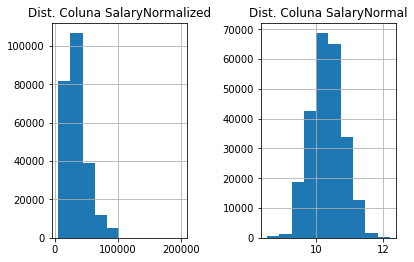

In [9]:
# Plotando histograma para validar a distribuição das duas colunas
plt.subplot(1,2,1)
plt.title('Dist. Coluna SalaryNormalized')
df_tmp.SalaryNormalized.hist()

plt.subplot(1,2,2)
plt.title('Dist. Coluna SalaryNormal')
df_tmp.SalaryNormal.hist()
plt.tight_layout(2)
plt.show()

* Combinando as colunas Title e FullDescription em uma nova coluna chamada Full_Title

In [13]:
# Adicionando dados aos dados faltantes do texto na coluna Company
df_tmp['Company'].fillna('missing', inplace=True)

In [23]:
df_tmp['Full_'] = df_tmp.Title.str.cat(df_tmp[['FullDescription','LocationRaw','Company','Category']], sep=" ")

In [24]:
df_tmp.Full_[244767]

'Accountant This entrepreneurial and growing private equity backed company is looking for an Accountant to join them and support the FD in running the finance function. As the Accountant you will manage a team of three accounts clerk and take responsibility for maintaining up to date and accurate financial records, preparing monthly management accounts and overseeing the ledgers, payroll and bank reconciliations. You will also provide the operational teams with relevant financial information. This would be an ideal opportunity for someone looking for their first move from practice or for someone already in an SME looking for a step up. You must be qualified (ACA/ACCA/CIMA) and have strong IT skills. Hitchin missing Teaching Jobs'

* Efetuando limpeza na coluna Full_Title

In [25]:
# criando a função para tokenizar/Limpar texto
def tokenizaTexto(x) :
  # Criando uma lista para receber a saida com o texto já 'tokenizado'
  saida = []
  # Gerando um padrão para a expressão regular ser aplicada
  padrao = "([a-zA-Z]+(?:'[a-z]+)?)"
  # Criando uma lista com as Stop Words, números e pontos
  listaStopWords = stopwords.words('english')
  listaStopWords += list(string.punctuation)
  listaStopWords += ['0','1','2','3','4','5','6','8','9']

  # Percorrendo o texto passado.
  for txt in x:
    # Alocando o texto com a primeira filtragem.
    txt_tokens_raw = nltk.regexp_tokenize(txt, padrao)
    # Padronizando o texto
    txt_tokens_min =[palavra.lower() for palavra in txt_tokens_raw]
    # Retirando simbolos e números.
    txt_words_stopped = [palavra for palavra in txt_tokens_min if palavra not in listaStopWords]
    saida.append(txt_words_stopped)
  # Gerando a saída com o texto tokenizado
  return pd.Series(saida)

In [26]:
data = tokenizaTexto(df_tmp.Full_)
data

0         [engineering, systems, analyst, engineering, s...
1         [stress, engineer, glasgow, stress, engineer, ...
2         [modelling, simulation, analyst, mathematical,...
3         [engineering, systems, analyst, mathematical, ...
4         [pioneer, miser, engineering, systems, analyst...
                                ...                        
244763    [teacher, science, position, qualified, teache...
244764    [teacher, business, studies, ict, position, qu...
244765    [english, teacher, position, qualified, teache...
244766    [supply, teachers, position, qualified, teache...
244767    [accountant, entrepreneurial, growing, private...
Length: 244768, dtype: object

### Separando dados para treino e variável alvo

* Carregando as bibliotecas necessárias

In [27]:
from sklearn.model_selection import train_test_split

* Alocando a target a uma variável separada

In [28]:
target = df_tmp['SalaryNormalized'] 

* Usando Train_test_split para separação entre dataset de treino e teste

In [29]:
len(data[0]),len(data[1]),len(data[2]),len(data[3]),len(data[4])

(48, 155, 172, 57, 40)

In [30]:
X_treino, X_teste, y_treino, y_teste = train_test_split(data, target, test_size=0.2, random_state=42)

### Preparação e Treinamento dos modelos

In [31]:
from gensim.models import Word2Vec

In [32]:
w2v_model1 = Word2Vec(data,
                size=64, #size is the number of dimensions of the N-dimensional space and Word2Vec maps the words into
                window=10,
                min_count=10, #min frequency appeared in the corpus
                workers=4)

In [33]:
# Conferiando a contagem de palavras.
w2v_model1.train(data,total_examples=w2v_model1.corpus_count, epochs=5)

(187913929, 200461895)

In [34]:
# Alocando o modelo em uma variável
wv = w2v_model1.wv

In [35]:
# Conferindo o tamanho do vocabulário
palavras = list(wv.vocab)
print(f'Tamanho Vocabulário: {len(palavras)} palavras.')

Tamanho Vocabulário: 34255 palavras.


In [37]:
# Transformando os dados em um dicionário para poder usar no pipeline
w2v = dict(zip(w2v_model1.wv.index2word, w2v_model1.wv.vectors))

In [38]:
# Criando uma classe para a incorporação do texto nos vetores 
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.values())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

### Treinando os modelos para o baseline

In [76]:
# Importando as bibliotecas
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Usando Pipeline para os modelos. 

rf =  Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('Random Forest', RandomForestRegressor(n_estimators=25, verbose=True, n_jobs=3))])

#ri = Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
#               ('Ridge', Ridge(alpha=0.9))])
                
#lr = Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
#              ('Linear Regression', LinearRegression(n_jobs=3))])

models = [('Random Forest', rf),]# ('Ridge', ri),
           #('Linear Regression', lr)]

scores = [(name, cross_val_score(model, X_treino, y_treino).mean()) for name, model, in models]

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  5.0min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  4.9min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  4.7min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  2

In [77]:
scores

[('Random Forest', 0.5618870773040483)]

In [78]:
rf.fit(X_treino,y_treino)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  6.1min finished


Pipeline(steps=[('Word2Vec Vectorizer',
                 <__main__.MeanEmbeddingVectorizer object at 0x7f39911ef190>),
                ('Random Forest',
                 RandomForestRegressor(n_estimators=25, n_jobs=3,
                                       verbose=True))])

In [82]:
y_pred = rf.predict(X_teste)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:    0.7s finished


In [83]:
from sklearn.metrics import mean_absolute_error

In [84]:
mean_absolute_error(y_teste, y_pred)

7668.979674668347